In [1]:
import pandas as pd
from pysyncon import Dataprep, PenalizedSynth

In [2]:
df = pd.read_csv("../../data/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)

In [3]:
pen.weights()

Aragon                          0.000
Baleares (Islas)                0.217
Andalucia                       0.000
Canarias                        0.000
Cantabria                       0.000
Castilla Y Leon                 0.000
Castilla-La Mancha              0.000
Cataluna                        0.636
Comunidad Valenciana            0.000
Extremadura                     0.000
Galicia                         0.000
Madrid (Comunidad De)           0.147
Murcia (Region de)              0.000
Navarra (Comunidad Foral De)    0.000
Principado De Asturias          0.000
Rioja (La)                      0.000
Name: weights, dtype: float64

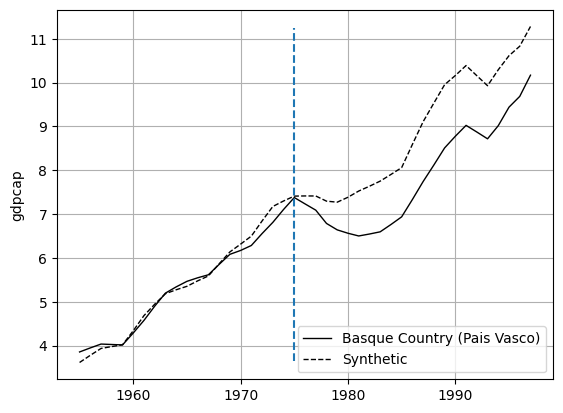

In [4]:
pen.path_plot(time_period=range(1955, 1998), treatment_time=1975)

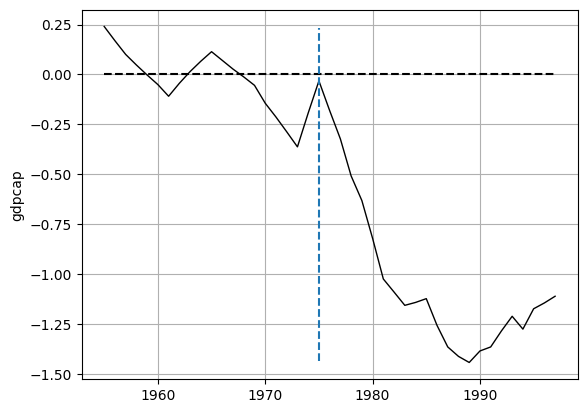

In [5]:
pen.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)